In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

edu_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = edu_df["STATE"].unique()

for state in states:
    edu_df.loc[edu_df["STATE"] == state, fill_list] = edu_df.loc[edu_df["STATE"] == state, fill_list].interpolate()

edu_df.dropna(inplace=True)

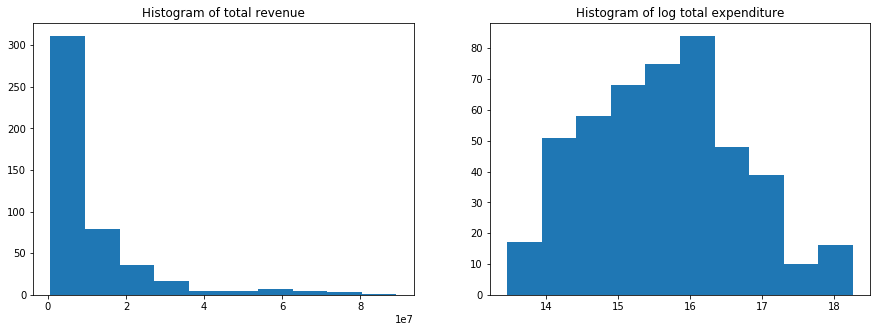

In [5]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(edu_df["TOTAL_REVENUE"])
plt.title("Histogram of total revenue")

plt.subplot(1,2,2)
plt.hist(np.log(edu_df["TOTAL_EXPENDITURE"]))
plt.title("Histogram of log total expenditure")
plt.show()

In [9]:
from scipy.stats.mstats import winsorize

winsorized_revenue = winsorize(edu_df["TOTAL_REVENUE"], (0, 0.10))

winsorized_expenditure = winsorize(edu_df['TOTAL_EXPENDITURE'], (0, 0.10))

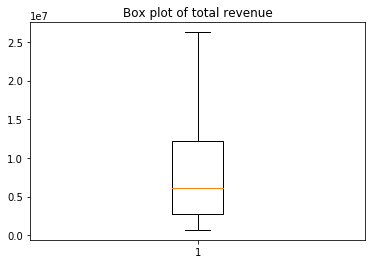

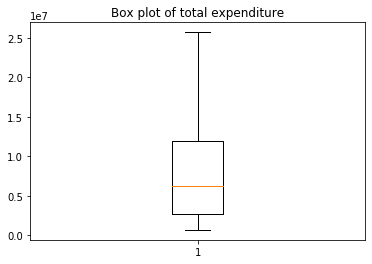

In [10]:
plt.boxplot(winsorized_revenue)
plt.title("Box plot of total revenue")
plt.show()

plt.boxplot(winsorized_expenditure)
plt.title("Box plot of total expenditure")
plt.show()

In [11]:
budget_deficit = edu_df.TOTAL_REVENUE - edu_df.TOTAL_EXPENDITURE

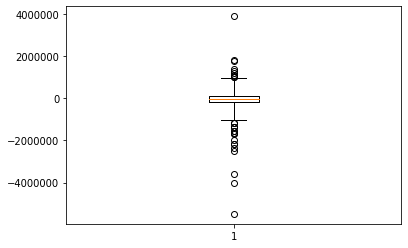

In [12]:
plt.boxplot(budget_deficit, whis=3)
plt.show()

In [13]:
winsorized_budget_deficit = winsorize(budget_deficit, (0.05, 0.05))

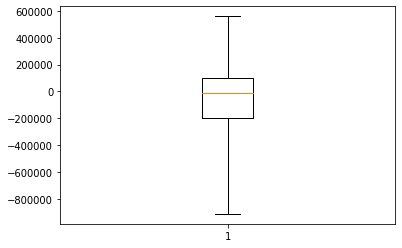

In [14]:
plt.boxplot(winsorized_budget_deficit, whis=3)
plt.show()

In [15]:
x = winsorized_revenue - winsorized_expenditure

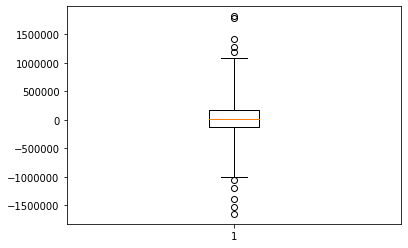

In [16]:
plt.boxplot(x, whis=3)
plt.show()

In [17]:
winsorized_x = winsorize(x, (0.05, 0.05))

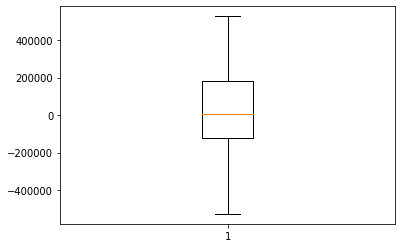

In [18]:
plt.boxplot(winsorized_x, whis=3)
plt.show()

In [20]:
pd.DataFrame({"original_budget": budget_deficit, "winsorized_budget1": winsorized_budget_deficit,
              "winsorized_budget2": winsorized_x}).describe()

,original_budget,winsorized_budget1,winsorized_budget2
count,4.660000e+02,466.000000,466.000000
mean,-8.094882e+04,-58733.012876,42601.083691
std,6.144222e+05,341300.816505,287393.469948
min,-5.487742e+06,-913765.000000,-526142.000000
25%,-1.965748e+05,-196574.750000,-123882.250000
50%,-8.872500e+03,-8872.500000,8133.500000
75%,1.013948e+05,101394.750000,180287.250000
max,3.897129e+06,560511.000000,526078.000000
